Importar Bibliotecas

In [7]:
import sys
!{sys.executable} -m pip install minisom


  Using cached minisom-2.3.5.tar.gz (12 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12043 sha256=88570ba4b4d2b279ce4a1ec25f6948390400bffb6563bc65df67655accc7d4a9
  Stored in directory: c:\users\diego\appdata\local\pip\cache\wheels\e8\17\33\9811ca090036d37bee1c8469b36fb913ab5dd12dfd78313279
Successfully built minisom


In [6]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('test_estandarizado.csv')
df.head()
df.count()
scaler = MinMaxScaler()
data_som = scaler.fit_transform(df)
##data_som = df.to_numpy()
print(type(data_som))
print(data_som.shape)
print(data_som[:5])


<class 'numpy.ndarray'>
(460959, 29)
[[0.25       0.33333333 0.         0.59376006 0.44779327 0.6306733
  0.51615894 0.56278681 0.12226977 0.         1.         1.
  1.         0.         0.5        0.5        0.33333333 0.
  0.         0.         0.         0.         0.         0.
  1.         1.         0.         0.         0.        ]
 [0.5        0.66666667 0.         0.67518896 0.60170515 0.67576707
  0.76290847 0.69865094 0.46341596 1.         1.         0.
  0.         1.         0.5        0.         0.         0.
  1.         0.         0.         1.         0.         0.
  0.         1.         0.         0.         0.        ]
 [0.75       1.         0.33333333 0.60287579 0.49702245 0.56350868
  0.66422947 0.56983859 0.43856966 1.         1.         0.
  0.         0.         0.5        0.5        0.33333333 0.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.        ]
 [0.5        0.66666667 0.33333333 0.95114136 

MiniSom Training

Para escoger la cantidad de neuronas se usa la formula heuristica Nsom = 5 * sqrt(Nmuestras)

El tamaño optimo es 58x58 pero mi computador no puede :(

In [8]:
n_neurons = 15
m_neurons = 15

som = MiniSom(n_neurons, m_neurons, data_som.shape[1], sigma=1.5, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=0)

##som.pca_weights_init(data_som) el dataset es demasiado grande para esto
som.train(data_som, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: nan


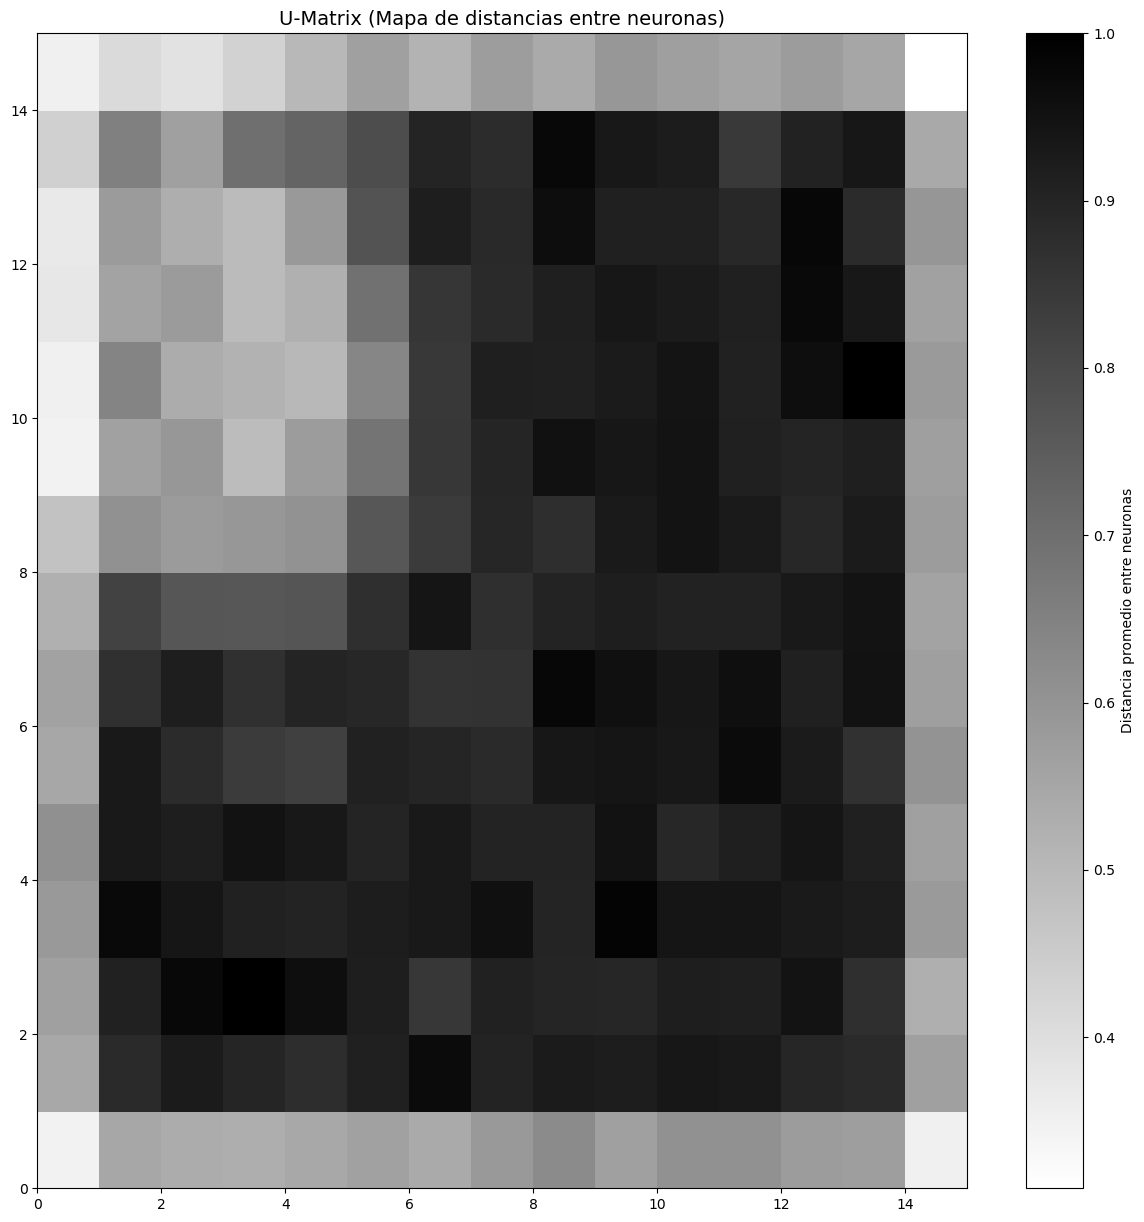

In [ ]:

u_matrix = som.distance_map().T

plt.figure(figsize=(15, 15))
plt.title('U-Matrix (Mapa de distancias entre neuronas)', fontsize=14)
plt.pcolor(u_matrix, cmap='gist_yarg')
plt.colorbar(label='Distancia promedio entre neuronas')
plt.show()

Sacar archivos de train, test y val

In [10]:
df = pd.read_csv('test_estandarizado.csv')
df = df.dropna()

y = df['ParentSupport']
X = df.drop(columns = ['ParentSupport'])

# División 80% entrenamiento, 20% prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("Tamaño de X_train:", len(X_train))
print("Tamaño de X_val:", len(X_val))
print("Tamaño de X_test:", len(X_test))

Tamaño de X_train: 295012
Tamaño de X_val: 73754
Tamaño de X_test: 92192


In [12]:
X_train.to_csv("X_train.csv", index=False)
Y_train.to_csv("Y_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
Y_val.to_csv("Y_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
Y_test.to_csv("Y_test.csv", index=False)

Implementación de Algoritmo de Clasificación: Regresión Logística

In [13]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, Y_train)
clf.predict(X.iloc[:2, :])
clf.predict_proba(X.iloc[:2, :])
clf.score(X_test, Y_test)

0.6313671468240194